In [138]:
import pandas as pd
import numpy as np
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

from tqdm import tqdm # progress bar
from scipy.sparse import csr_matrix, save_npz
import os

In [139]:
movies = pd.read_csv("../data/movies.csv")
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [140]:
ratings = pd.read_csv("../data/ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


## Dealing with Duplicate Data

In [141]:
duplicates = movies[movies.duplicated(subset=['title'], keep=False)]
sorted_duplicates = pd.DataFrame(duplicates.sort_values("title"))

sorted_duplicates

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [142]:
duplicateIds = [6003, 26958, 32600, 168358, 64997]
movies = movies[~movies["movieId"].isin(duplicateIds)]

In [143]:
movies.to_csv(os.path.join("..","data","cleaned_movies.csv"), index = False)

## Entire Network

In [144]:
merged_ratings = pd.merge(ratings, movies, on='movieId', how='inner')

In [145]:
whole_G = nx.Graph()

In [147]:
user_nodes = set(merged_ratings["userId"])
movie_nodes = set(merged_ratings["title"])
edges = [(int(row['userId']), (row['title'])) for _, row in merged_ratings.iterrows()]

whole_G.add_nodes_from(user_nodes, bipartite=0, color ="red")
whole_G.add_nodes_from(movie_nodes, bipartite=1, color = "blue")
whole_G.add_edges_from(edges)

In [ ]:
[len(c) for c in sorted(nx.connected_components(whole_G), key=len, reverse=True)]

[10329]

In [ ]:
degree_centrality = nx.betweenness_centrality(whole_G)

In [ ]:
degree_centrality = nx.closeness_centrality(whole_G)

In [ ]:
## Separating Centralities

users_centrality_closeness = {}
movie_centrality_closeness = {}

for i,k in degree_centrality.items():
    if isinstance(i,int):
        users_centrality_closeness[i] = k 
        print 
    else:
        movie_centrality_closeness[i] = k

In [ ]:
sorted(users_centrality_closeness.items(), key=lambda item: item[1], reverse = True)

[(414, 0.4134342099995997),
 (599, 0.4062782738680618),
 (474, 0.3947861320285922),
 (448, 0.38758584456036327),
 (274, 0.3730809522089369),
 (610, 0.37176487527446817),
 (68, 0.3707240030151836),
 (380, 0.369609562323301),
 (606, 0.3669307563861158),
 (288, 0.3653730498461103),
 (249, 0.3651147170078128),
 (387, 0.3646506372912474),
 (182, 0.36336769517644163),
 (307, 0.3633421284080915),
 (298, 0.36242411481910375),
 (603, 0.36237325006140136),
 (177, 0.3615360380859033),
 (318, 0.36090435754970823),
 (232, 0.36040060020239384),
 (480, 0.35979794460895315),
 (608, 0.35957246805695786),
 (600, 0.357952379301979),
 (483, 0.3570860560799364),
 (590, 0.35703667853562415),
 (105, 0.35686396461767045),
 (19, 0.3564944254599427),
 (305, 0.3558066627622558),
 (489, 0.3551703978816328),
 (111, 0.35490189340572487),
 (438, 0.35468250970156945),
 (140, 0.35419596008093557),
 (477, 0.35400171379605827),
 (555, 0.35344444064200403),
 (91, 0.35322685454358904),
 (217, 0.35315438536501964),
 (28, 0

In [148]:
users_centrality_betweeness
movie_centrality_betweeness

{'Man with the Golden Gun, The (1974)': 0.00010383768816361114,
 'Dumb and Dumberer: When Harry Met Lloyd (2003)': 1.601970829886861e-05,
 'Muppet Christmas Carol, The (1992)': 0.0001516056474780924,
 'Bring It On: Fight to the Finish (2009)': 0.0,
 '800 Bullets (800 Balas) (2002)': 0.0,
 'Carry on Cruising (1962)': 0.0,
 'Night of the Hunter, The (1955)': 1.647154749155226e-05,
 'Muppets, The (2011)': 8.121536163155722e-05,
 'Ong-Bak: The Thai Warrior (Ong Bak) (2003)': 5.834330009541404e-05,
 'Doom (2005)': 2.0557742030996588e-05,
 'Bliss (2012)': 0.0,
 'Unthinkable (2010)': 0.0,
 'Dream a Little Dream (1989)': 0.0,
 'Band Wagon, The (1953)': 1.0077604330463495e-05,
 'Gone in 60 Seconds (2000)': 0.00041156094882635445,
 'Sign of Four, The (1987)': 0.0,
 'Tooth Fairy (2010)': 7.832461974756922e-06,
 "Beat That My Heart Skipped, The (battre mon coeur s'est arrêté, De) (2005)": 2.4733665243371e-07,
 'Don Jon (2013)': 3.0344533067565166e-05,
 'The Putin Interviews (2017)': 0.0,
 'And The

In [ ]:
nodes_set_1 = {n for n, d in whole_G.nodes(data=True) if d['bipartite'] == 0}
nodes_set_2 = set(whole_G) - nodes_set_1

degree_centrality_set_1 = {n: whole_G.degree(n) / (len(nodes_set_1) - 1) for n in nodes_set_1}

degree_centrality_set_2 = {n: whole_G.degree(n) / (len(nodes_set_2) - 1) for n in nodes_set_2}

sorted(degree_centrality_set_2.items(), key=lambda item: item[1], reverse = True)


[('Forrest Gump (1994)', 0.033854702613706524),
 ('Shawshank Redemption, The (1994)', 0.03261988063387528),
 ('Pulp Fiction (1994)', 0.03159086231734925),
 ('Silence of the Lambs, The (1991)', 0.028709611031076353),
 ('Matrix, The (1999)', 0.02860670919942375),
 ('Star Wars: Episode IV - A New Hope (1977)', 0.025828359744803457),
 ('Jurassic Park (1993)', 0.024490635933319613),
 ('Braveheart (1995)', 0.02438773410166701),
 ('Terminator 2: Judgment Day (1991)', 0.023050010290183165),
 ("Schindler's List (1993)", 0.02263840296357275),
 ('Fight Club (1999)', 0.022432599300267544),
 ('Toy Story (1995)', 0.022123893805309734),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)',
  0.02171228647869932),
 ('American Beauty (1999)', 0.020991973657131097),
 ('Usual Suspects, The (1995)', 0.020991973657131097),
 ('Seven (a.k.a. Se7en) (1995)', 0.020889071825478493),
 ('Independence Day (a.k.a. ID4) (1996)', 0.02078616999382589),
 ('Apollo 13 (1995)', 0.020683268162173286),
 ('Raiders of th

In [ ]:
sorted(users_centrality.items(), key=lambda item: item[1], reverse = True)

[(599, 0.14135014394561446),
 (414, 0.1314760143851392),
 (474, 0.122500936784766),
 (448, 0.1067599897604404),
 (610, 0.058826508971030214),
 (606, 0.05007547363294283),
 (89, 0.04225691335348624),
 (318, 0.03983043147305003),
 (105, 0.034454978174557775),
 (380, 0.03368450239023609),
 (274, 0.033236954010957255),
 (603, 0.03248794871303139),
 (387, 0.03215788911158444),
 (307, 0.024106610303607372),
 (68, 0.023751693718565937),
 (249, 0.02246010007660688),
 (288, 0.022266605850943377),
 (182, 0.021026215989292982),
 (111, 0.02080843961510119),
 (298, 0.018511854584181767),
 (232, 0.01784362316803908),
 (177, 0.015783390384640345),
 (462, 0.013644615424437824),
 (567, 0.012917593417091958),
 (483, 0.012093893997307231),
 (50, 0.011881529437114745),
 (19, 0.011444003718311748),
 (28, 0.011327602978239879),
 (305, 0.010954712887656436),
 (140, 0.010232513933894676),
 (514, 0.010176285312234641),
 (600, 0.009815623358244782),
 (125, 0.009522197336438104),
 (555, 0.009377188857375932),
 (

In [ ]:
sorted(movie_centrality_betweeness.items(), key=lambda item: item[1], reverse = True)

[('Forrest Gump (1994)', 0.006409604798780413),
 ('Pulp Fiction (1994)', 0.005045008428079727),
 ('Matrix, The (1999)', 0.00478298916282478),
 ('Silence of the Lambs, The (1991)', 0.004567263430556517),
 ('Shawshank Redemption, The (1994)', 0.004212398693866532),
 ('Star Wars: Episode IV - A New Hope (1977)', 0.004149444569455065),
 ('Toy Story (1995)', 0.003846860993109611),
 ('Back to the Future (1985)', 0.003276582968746033),
 ('Fight Club (1999)', 0.00327257927809914),
 ('American Beauty (1999)', 0.0032152005429293695),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  0.003109714951488222),
 ('Jurassic Park (1993)', 0.0030757191249770697),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)',
  0.0030527080272744526),
 ('Godfather, The (1972)', 0.0030228656650132923),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 0.0029574669040535796),
 ('Memento (2000)', 0.002868284282610224),
 ('Lord of the Rings: The Fellowship of the Ring, The

In [ ]:
sorted(movie_centrality_closeness.items(), key=lambda item: item[1], reverse = True)

[('Forrest Gump (1994)', 0.48243647234678627),
 ('Matrix, The (1999)', 0.469369205598982),
 ('Pulp Fiction (1994)', 0.4649738879884747),
 ('Silence of the Lambs, The (1991)', 0.46239255014326647),
 ('Star Wars: Episode IV - A New Hope (1977)', 0.46127735596248326),
 ('Back to the Future (1985)', 0.4537785588752197),
 ('Fight Club (1999)', 0.4525457891508194),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  0.4517144856543037),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 0.45112256486415653),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 0.450453593859037),
 ('Toy Story (1995)', 0.45010023533513466),
 ('American Beauty (1999)', 0.44998257232485184),
 ('Memento (2000)', 0.4491606506045055),
 ('Lord of the Rings: The Fellowship of the Ring, The (2001)',
  0.4479916717272491),
 ('Jurassic Park (1993)', 0.4478362674529529),
 ('Groundhog Day (1993)', 0.4462881341284245),
 ('Truman Show, The (1998)', 0.44609536973047687),
 ('Godfat

In [ ]:
top_rated = pd.DataFrame(ratings['movieId'].value_counts().head(10)).reset_index()
top_rated.columns = ['movieId', 'ratingCount']

# Merging
result_df = top_rated.merge(merged_ratings, on="movieId", how="inner")

In [ ]:
top_rated.merge(movies, on = "movieId", how = "left")

,movieId,ratingCount,title,genres
0,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,317,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,110,237,Braveheart (1995),Action|Drama|War
8,589,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi
9,527,220,Schindler's List (1993),Drama|War


In [ ]:
len(ratings)/len(movies)

10.355961795214132

In [ ]:
ratings["userId"].nunique()

610

## Graphing a Random Sample Network:

In [ ]:
np.random.seed(123)
random_indices = np.random.randint(0, len(merged_ratings), 500)
random_ratings = merged_ratings.iloc[random_indices]

In [ ]:
G = nx.Graph()

In [ ]:
user_nodes = set(random_ratings["userId"])
movie_nodes = set(random_ratings["title"])
edges = [(int(row['userId']), (row['title'])) for _, row in random_ratings.iterrows()]

G.add_nodes_from(user_nodes, bipartite=0, color ="red")
G.add_nodes_from(movie_nodes, bipartite=1, color = "blue")
G.add_edges_from(edges)

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

pos = nx.spring_layout(subgraph, seed=42, scale=2)  # Adjust the 'scale' parameter to spread out the graph

# Set node colors
node_colors = [subgraph.nodes[node]['color'] for node in subgraph.nodes]

# Draw the subgraph with smaller nodes, smaller text, and visible edges
nx.draw(subgraph, pos, with_labels=True, font_size=8, font_weight='bold', node_color=node_colors, node_size=100, alpha=0.5)

# Draw edges separately to make them more visible
nx.draw_networkx_edges(subgraph, pos, width=1.0, alpha=0.5)

plt.show()

NameError: name 'plt' is not defined

## Colaborative Filtering Matrix

In [ ]:
ratings['demeaned_rating'] = ratings["rating"] - 3.5

In [ ]:
merged_ratings = pd.merge(ratings, movies, on='movieId', how='inner')
sparse_collabfitering = merged_ratings.pivot(index = "userId", columns ="movieId", values = "demeaned_rating")
sparse_collabfitering.head(10)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.5,NaN,0.5,NaN,NaN,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.5,1.5,-0.5,1.5,0.5,0.5,-0.5,NaN,-0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sparse_collabfitering.to_csv("collbarfilter.csv", index = False)

In [ ]:
sparse_matrix = csr_matrix(sparse_collabfitering)

In [ ]:
save_npz('collabfiltering.npz', sparse_matrix)

In [ ]:
n = len(sparse_collabfitering)

user_similarity = np.zeros((n, n))

In [ ]:
for i in tqdm(range(n)):
    user1_movies = sparse_collabfitering.iloc[i, :].notna().to_numpy()
    
    for k in range(i+1, n):
        user2_movies = sparse_collabfitering.iloc[k, :].notna().to_numpy()

        # Calculate intersection using bitwise AND
        intersection_index = user1_movies & user2_movies

        # Check if there are common movies
        if np.sum(intersection_index) >= 10:
            common_movies = sparse_collabfitering.iloc[i, intersection_index].values
            other_user_movies = sparse_collabfitering.iloc[k, intersection_index].values
            
            user_similarity[i, k] = cosine_similarity(common_movies.reshape(1, -1), other_user_movies.reshape(1, -1))[0, 0]
            user_similarity[k, i] = user_similarity[i, k]

100%|██████████| 610/610 [00:24<00:00, 25.04it/s] 


Our cosine similarities are between 0 and 1 becasue ratings can only be positive

In [ ]:
user_simDF = pd.DataFrame(user_similarity)
user_simDF.head(20)

NameError: name 'user_similarity' is not defined

In [ ]:
userids = ratings["userId"].unique()
user_simDF.columns = userids
user_simDF.index = userids

In [ ]:
user_simDF

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,0.000000,0.000000,0.0,0.208093,0.471698,0.103304,0.294579,0.452374,0.000000,0.000000,...,0.892165,0.327916,-0.040260,-0.214286,-0.204685,0.263286,0.303774,-0.049717,0.000000,0.636511
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.438069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.697629
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.208093,0.000000,0.0,0.000000,-0.177705,0.121724,0.543393,0.000000,0.000000,0.000000,...,-0.287261,0.359964,0.105315,0.000000,0.419314,0.119081,0.128295,-0.145913,0.000000,0.029465
5,0.471698,0.000000,0.0,-0.177705,0.000000,0.054133,0.000000,0.039253,0.000000,0.000000,...,0.000000,0.103944,0.212227,0.064062,-0.387768,0.314800,0.202150,-0.071134,0.372104,0.086711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.263286,0.000000,0.0,0.119081,0.314800,-0.048766,0.145026,0.288218,0.627986,-0.490739,...,0.728722,0.147282,0.308928,0.672450,0.138621,0.000000,0.105613,0.233112,0.471405,0.436794
607,0.303774,0.000000,0.0,0.128295,0.202150,0.371429,0.462037,0.377964,0.000000,0.000000,...,0.912024,0.314316,0.166897,0.099268,-0.229625,0.105613,0.000000,0.100871,-0.174078,0.336302
608,-0.049717,0.000000,0.0,-0.145913,-0.071134,0.047110,0.007372,0.334324,0.333050,-0.636523,...,0.562258,0.287611,0.099716,0.023721,-0.028419,0.233112,0.100871,0.000000,0.584602,0.211834
609,0.000000,0.000000,0.0,0.000000,0.372104,0.091960,0.000000,0.096374,0.000000,0.000000,...,0.000000,0.123731,0.347677,0.173422,0.000000,0.471405,-0.174078,0.584602,0.000000,-0.487088


In [ ]:
user_simDF.to_csv("UtU_similarityMatrix_demeaned.csv", index = False)

In [ ]:
threshold = 0.8

user_similarity_thresholded = np.where(user_similarity > threshold, 1, 0)
user_similarity_thresholded= pd.DataFrame(user_similarity_thresholded)

In [ ]:
user_similarity_thresholded

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
606,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
G = nx.from_pandas_adjacency(user_similarity_thresholded)
print(f"Total Edges: {len(G.edges())}")

Total Edges: 2201


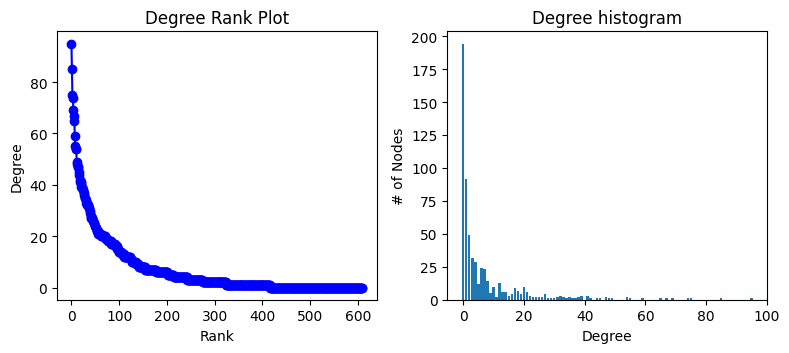

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [ ]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

Creating histogram...


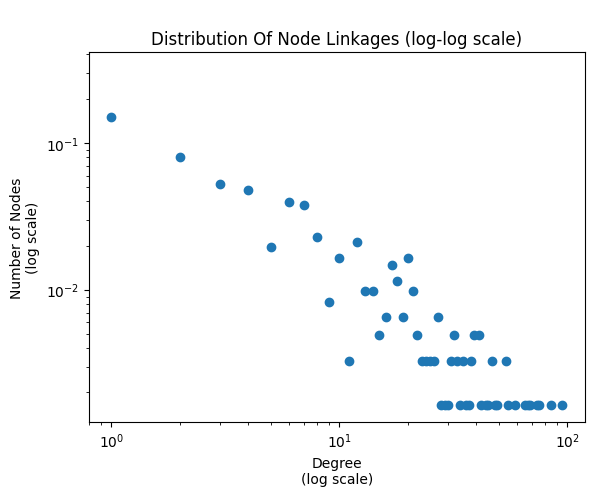

In [ ]:
aux_x, aux_y = plot_degree_histogram(G, normalized=True)

plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'o')
plt.show()

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

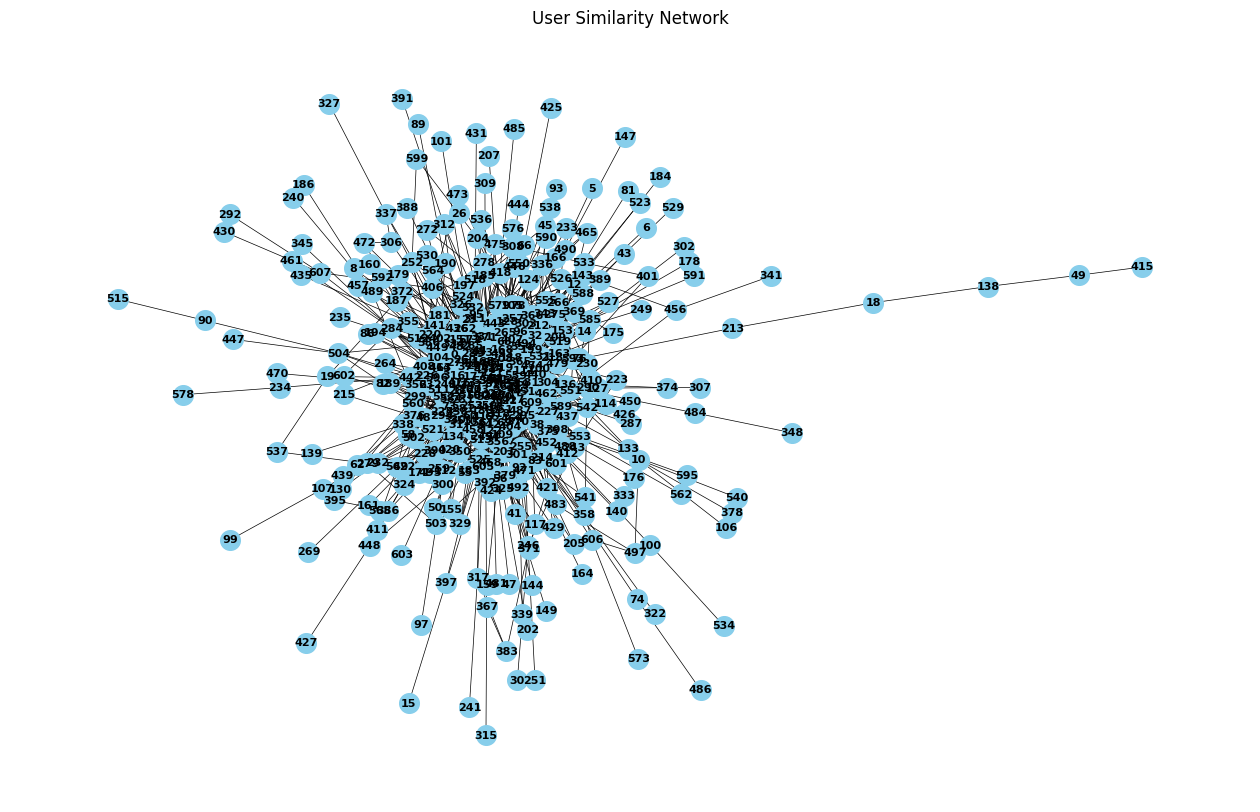

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
pos = nx.spring_layout(subgraph)

nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', font_color='black', font_size=8, edge_color='black', width=0.5)

plt.title("User Similarity Network")
plt.show()